# CLIMATE 405: Machine Learning for Earth and Environmental Sciences; FALL 2024
## Mohammed Ombadi (ombadi@umich.edu)

# Lecture 5 (Wednesday, 09/11/2024)
# Topics covered in this lecture:
- Revisit Feature Selection and Dimensionality Reduction from Lecture 4.
- Supervised vs Unsupervised learning.
- Clustering Algorithms: K-means

## Import libraries

In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
import pingouin as pg

# Suppress warnings
warnings.filterwarnings('ignore')

# Set number of decimals for np print options
np.set_printoptions(precision=3)

# Set the current working directory
os.chdir(sys.path[0])

## <center>Revisit Feature Selection</center>

### Why F-value scoring functions (e.g., f-classif) can yield nan values?

In lecture 4, we found that f-classif applied to the zoo data can provide infinity values. Let's run the example again, and explore why this happens. 

In [2]:
df = pd.read_csv('zoo_data.csv')
print(df.shape)
df.head()

(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Let's extract the features (X) and the labels (y) from the data:

In [3]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [8]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


Now, let's perform feature selection using f-classif:

In [147]:
from sklearn.feature_selection import SelectKBest, f_classif

In [148]:
# Feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_, index= df.columns[1:-1], columns= ['score'])
print('The scores for the features are = ', scores.sort_values(by= 'score', ascending= False))

The scores for the features are =                 score
feathers         inf
milk             inf
backbone         inf
toothed   197.489319
eggs      127.992638
hair       83.465718
breathes   74.193354
fins       45.696191
tail       28.999226
airborne   27.749632
legs       19.766548
aquatic    13.320054
catsize     9.122367
venomous    3.654354
predator    2.150226
domestic    0.783735


**The features (feathers, milk and backbone) all have inf values, Why?** 

Let's see the values of these features for each label:

In [151]:
df[df['type']==7][['feathers', 'milk', 'backbone', 'type']]

,feathers,milk,backbone,type
13,0,0,0,7
14,0,0,0,7
15,0,0,0,7
46,0,0,0,7
53,0,0,0,7
72,0,0,0,7
77,0,0,0,7
81,0,0,0,7
85,0,0,0,7
99,0,0,0,7


### Let's revisit Singular Value Decomposition (SVD):

Import the cats and dogs data:

In [10]:
df = pd.read_csv('cat_dog_data.csv', header= None)
print(df.shape)

(4096, 160)


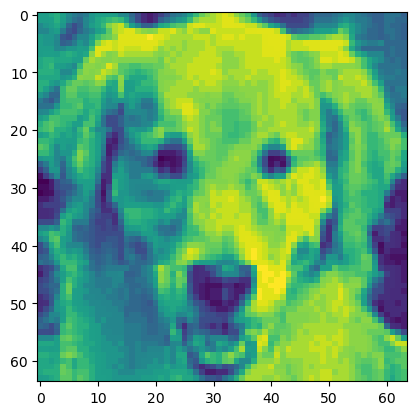

In [20]:
plt.imshow((df.iloc[:,111].values).reshape((64,64), order= 'F'))

Let's apply SVD:

In [21]:
# Set Features and Labels
# The features are the full dataset 'df'
X = np.copy(df.values)

# The labels are '0' for cats and '1' for dogs
y = (np.repeat([0, 1], 80))

# Perform Singular Value Decomposition
U, S, Vt = np.linalg.svd(X, full_matrices=False)

In [22]:
print('U = ', U.shape)
print('S = ', S.shape)
print('Vt = ', Vt.shape)

U =  (4096, 160)
S =  (160,)
Vt =  (160, 160)


The matrix U, which has a shape of m*n, have the modes of variability in the features space. The modes are ranked in terms of importance from the first column U[ : , 0] to the last column U[ : , n-1]

Let's plot the 4 leading modes of variability:

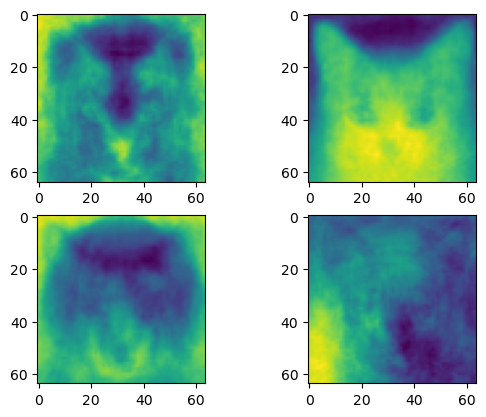

In [23]:
plt.subplot(2,2,1)
plt.imshow((U[:,0]).reshape((64,64), order= 'F'))

plt.subplot(2,2,2)
plt.imshow((U[:,1]).reshape((64,64), order= 'F'))

plt.subplot(2,2,3)
plt.imshow((U[:,2]).reshape((64,64), order= 'F'))

plt.subplot(2,2,4)
plt.imshow((U[:,3]).reshape((64,64), order= 'F'))

And, here are the corresponding indices of the samples for the 4 leading modes:

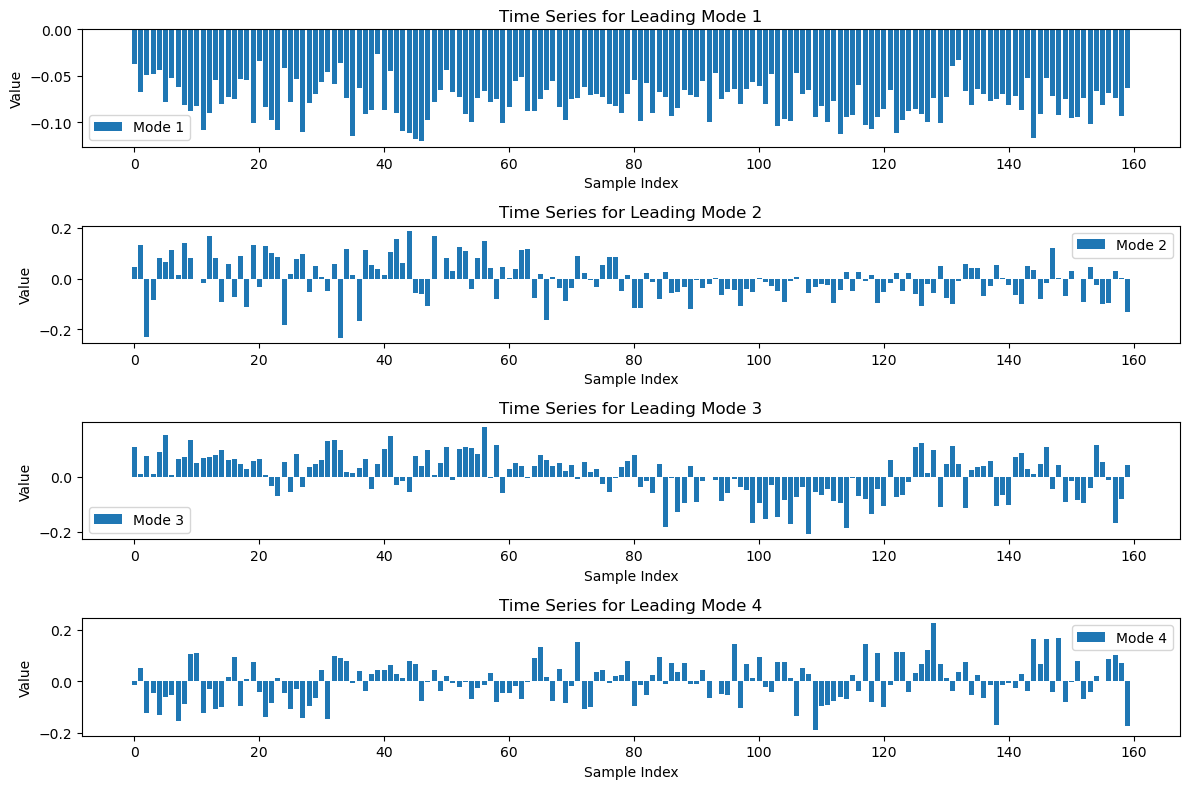

In [143]:
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.bar(np.arange(Vt.shape[1]), Vt[i, :], label=f'Mode {i+1}')
    plt.title(f'Time Series for Leading Mode {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

The leading modes carry a larger portion of the information in the original data. Let's check this by reproducing the images of cat no.2 (index = 1), using different number of modes:

Text(0.5, 1.0, 'Original Image')

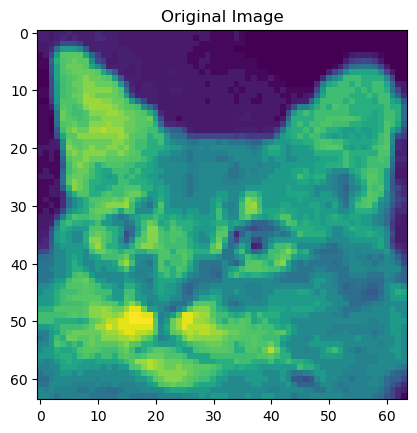

In [128]:
# Original image
plt.imshow((df.iloc[:,1].values).reshape((64,64), order= 'F'))
plt.title('Original Image')

Text(0.5, 1.0, 'Reconstrcuted Image using the 4 leading modes')

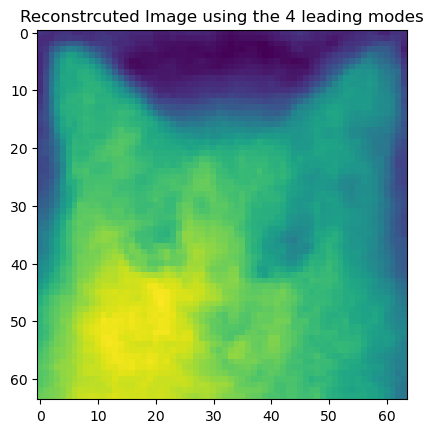

In [138]:
plt.imshow(np.matmul(U[:,:4],Vt[:4,1]).reshape((64,64), order= 'F')) 
plt.title('Reconstrcuted Image using the 4 leading modes')

Text(0.5, 1.0, 'Reconstrcuted Image using the 100 leading modes')

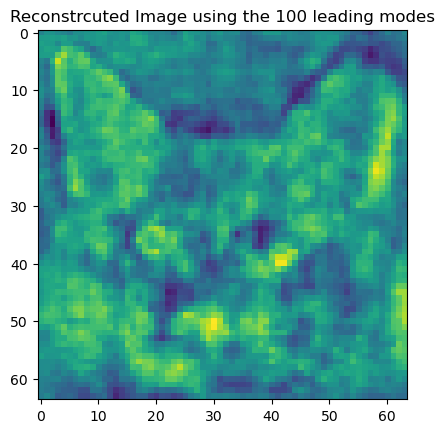

In [57]:
plt.imshow(np.matmul(U[:,:100],Vt[:100,1]).reshape((64,64), order= 'F')) 
plt.title('Reconstrcuted Image using the 100 leading modes')

Text(0.5, 1.0, 'Reconstructed Image using all modes')

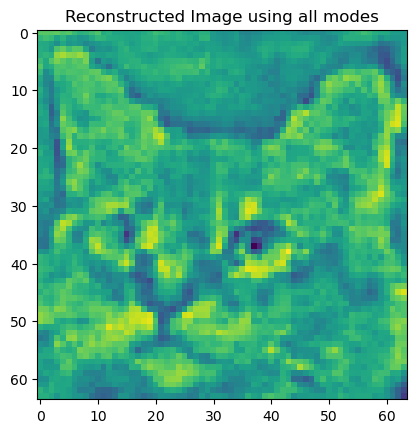

In [53]:
plt.imshow(np.matmul(U[:,:],Vt[:,1]).reshape((64,64), order= 'F')) 
plt.title('Reconstructed Image using all modes')

## <center> Supervised vs Unspervised Learning </center> 

**What is the difference between supervised and unsupervised learning?** _Please refer to class notes for more information_

**Supervised Learning - Visual Example**

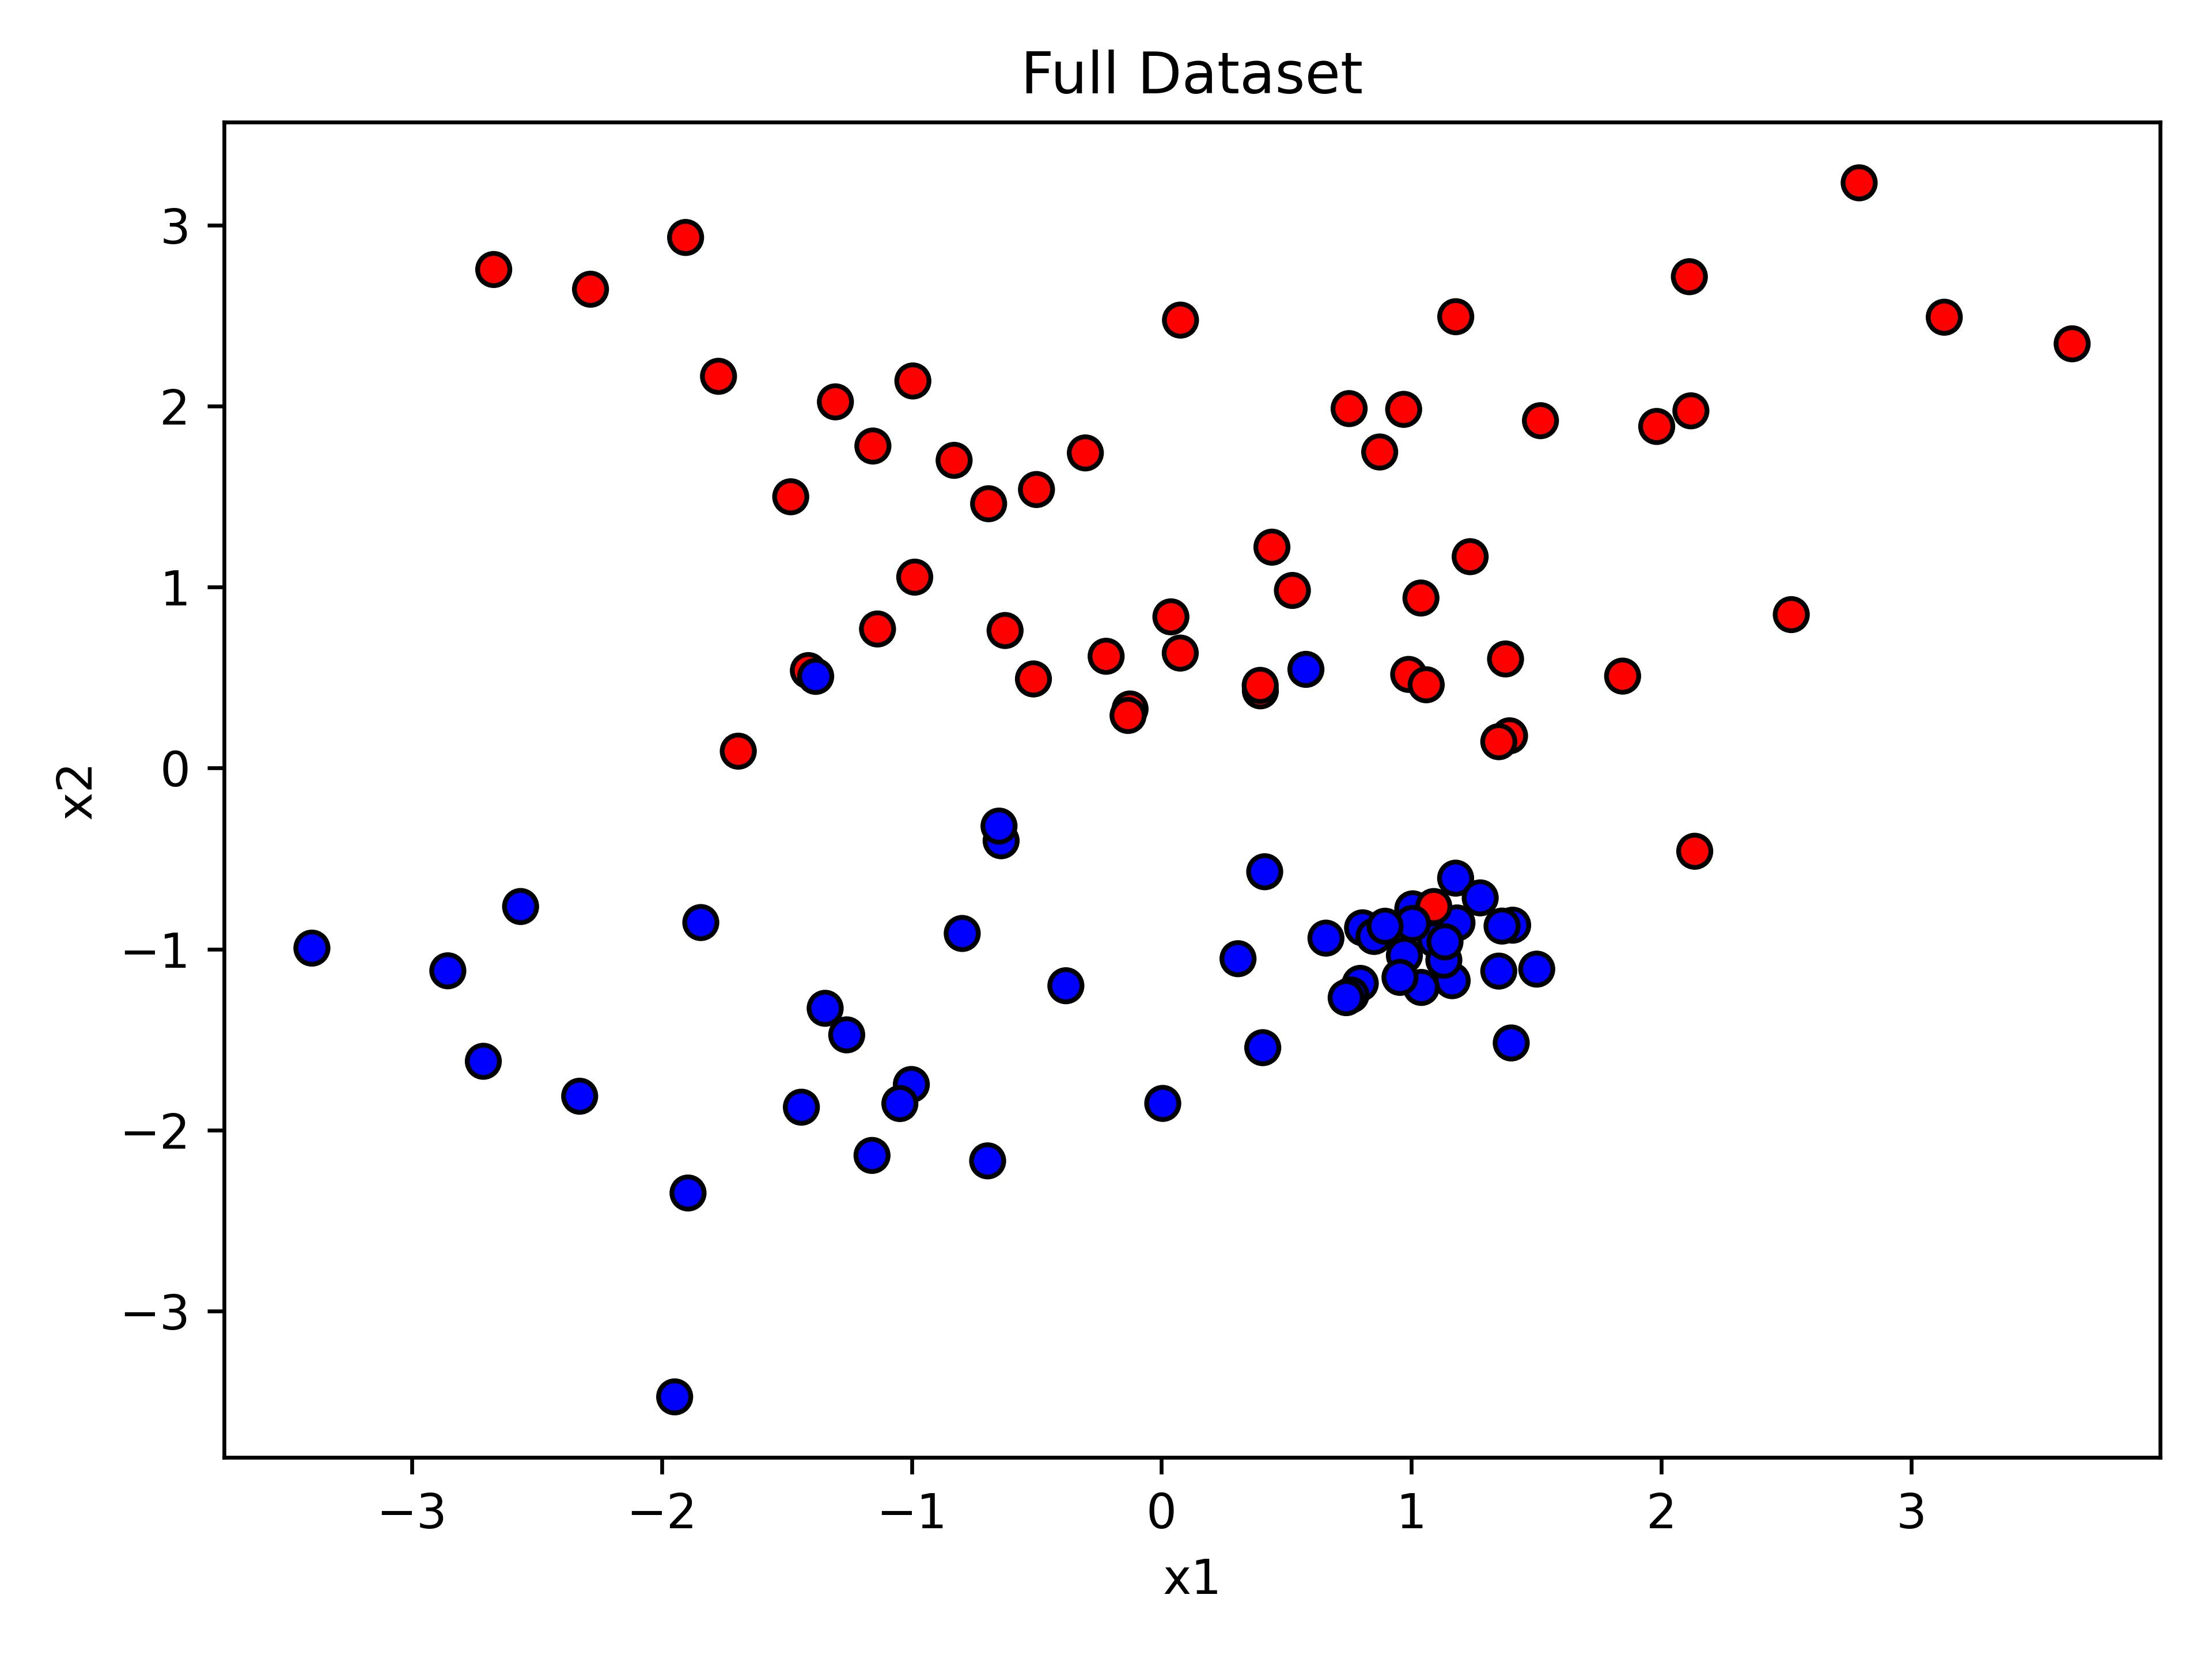

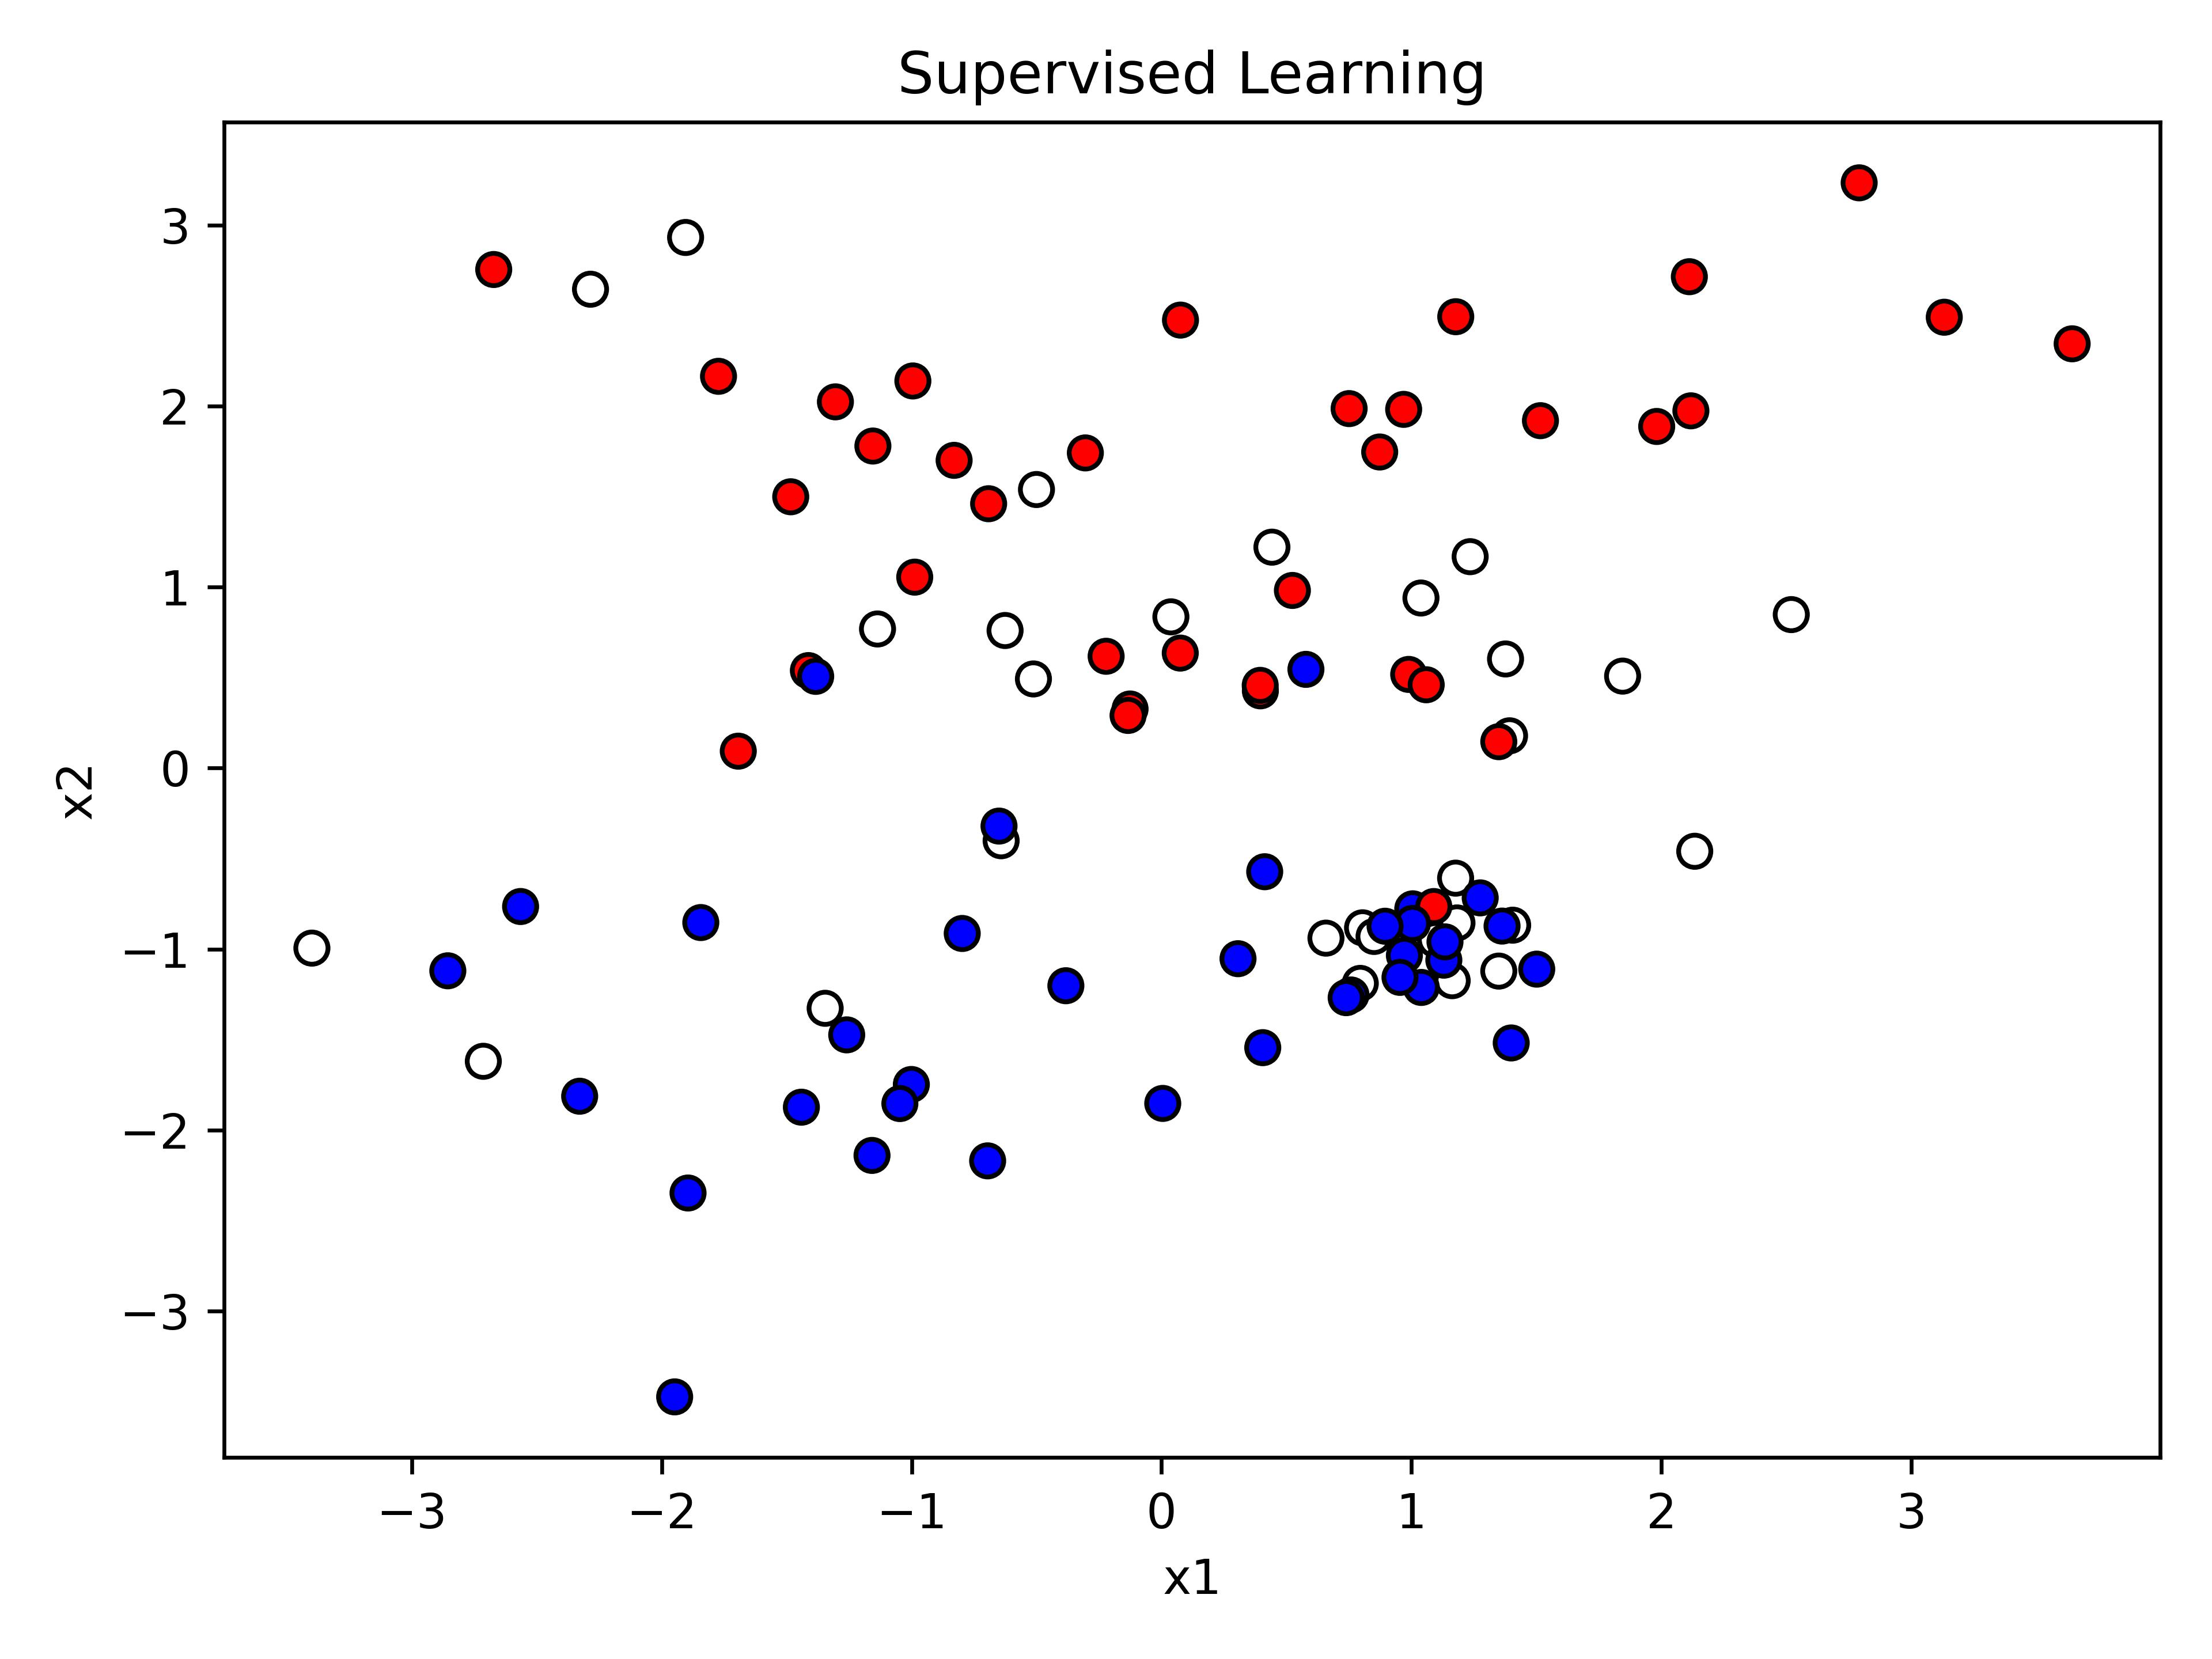

In [63]:
display(Image(filename = 'Full Dataset_Example.jpeg', width= 600, height= 600))
display(Image(filename = 'Supervised Learning_Example.jpeg', width= 600, height= 600))

**Unsupervised Learning - Visual Example**

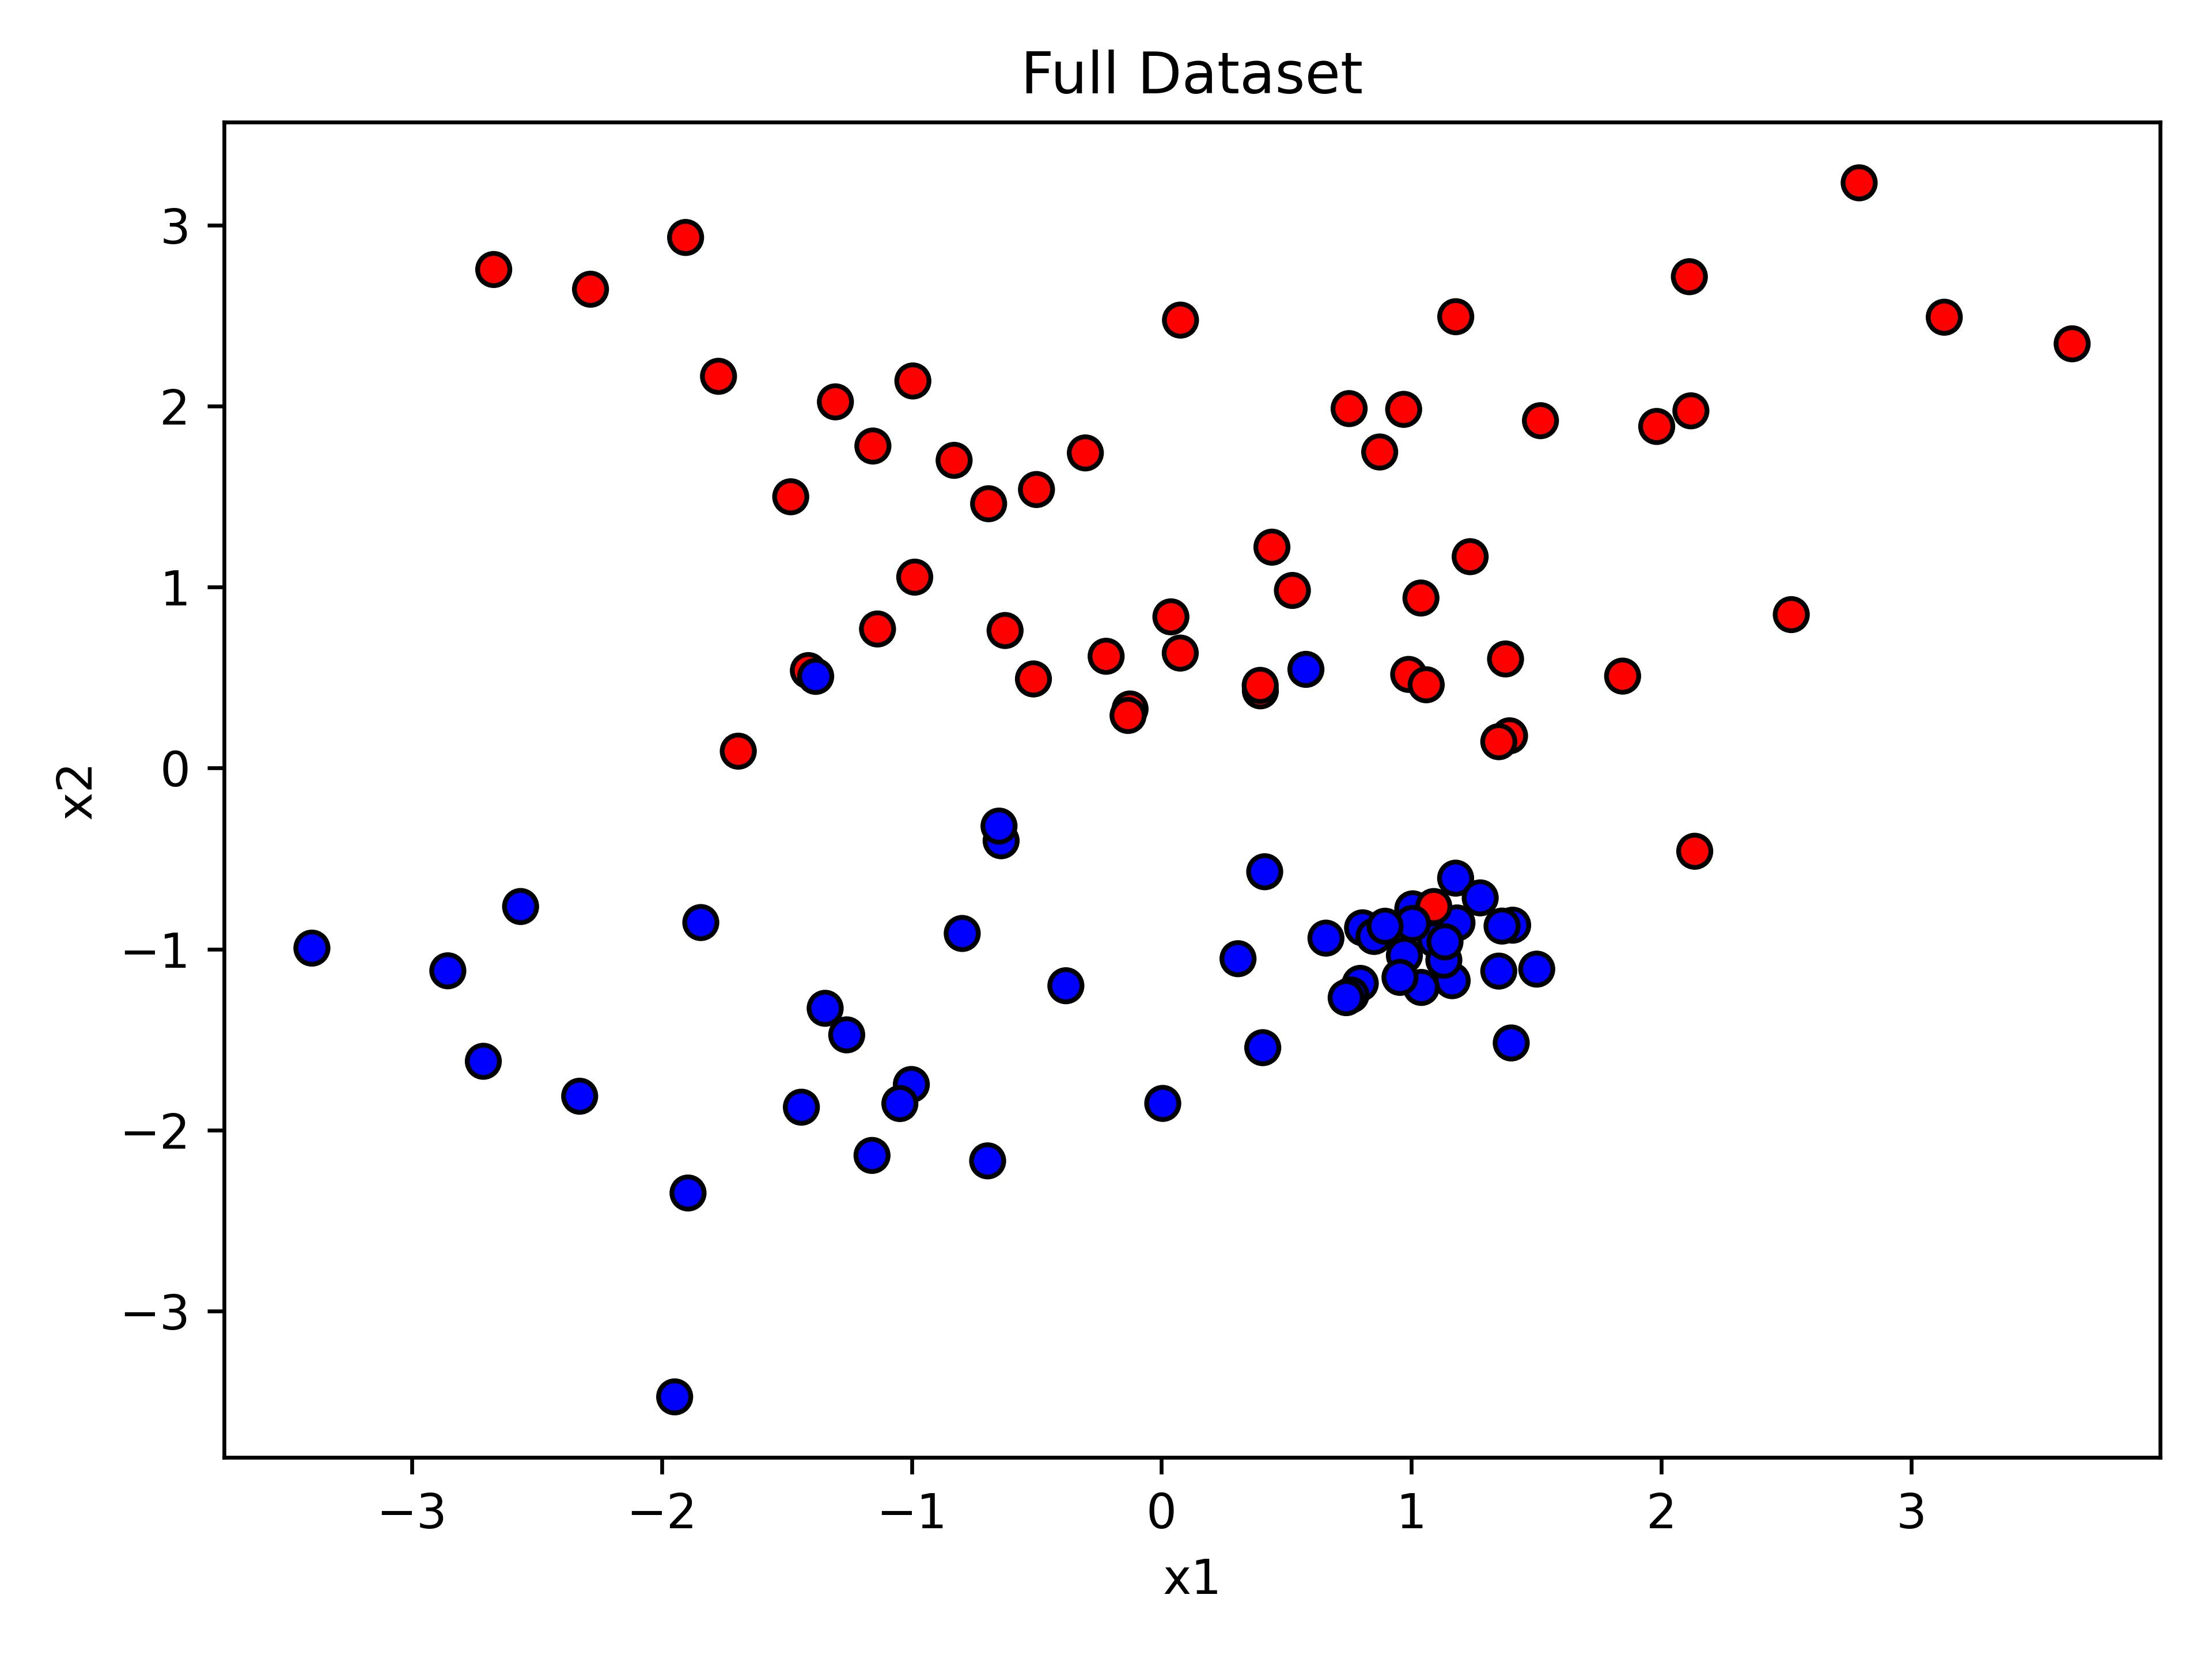

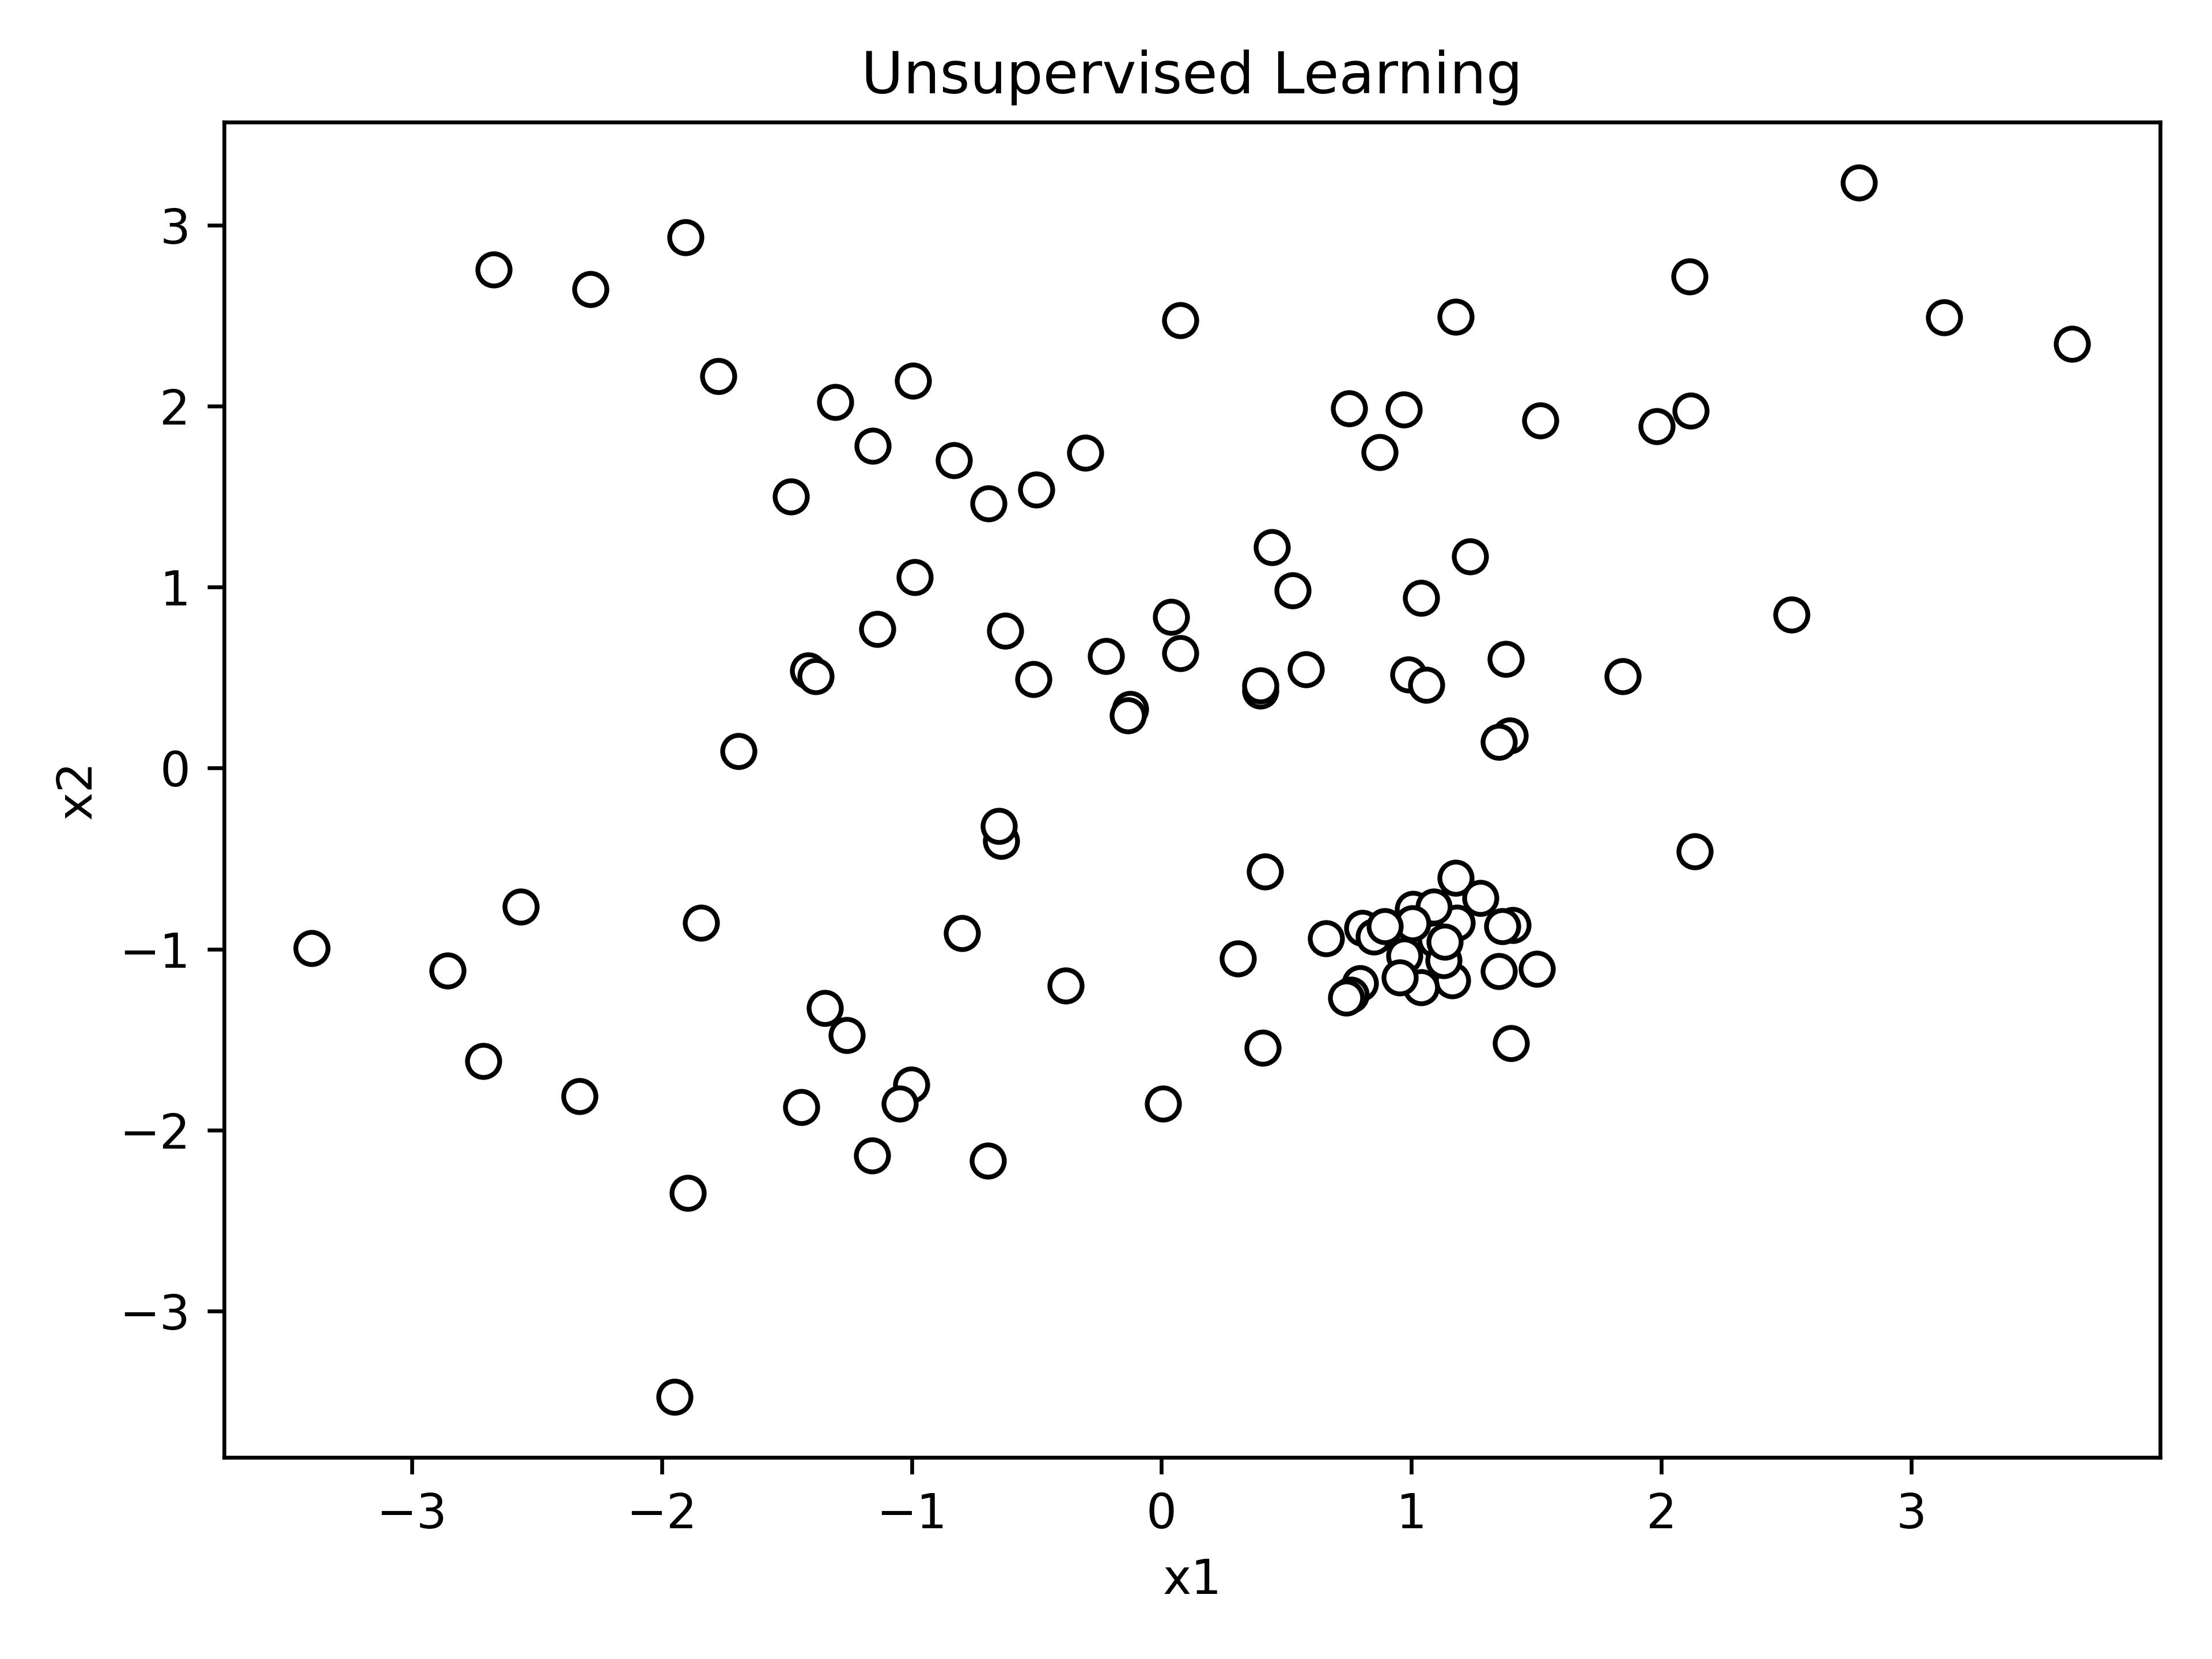

In [66]:
display(Image(filename = 'Full Dataset_Example.jpeg', width= 600, height= 600))
display(Image(filename = 'Unsupervised Learning_Example.jpeg', width= 600, height= 600))

## <center> Clustering Algorithms: K-means </center>

- Clustering is a machine learning task that fall within the category of unsupervised learning
- K-means is arguably the most important and widely used clustering algorithm

**What is K-means algorithms?**

An algorithm that partitions the observations (samples) into **_K_** clusters, where each observation is assigned to the nearest mean or centroid

Let's explore this through an example:

#### 1- Generate synthetic data for classification:

In [153]:
from sklearn.datasets import make_classification

In [168]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [172]:
clustering_example = pd.DataFrame(np.column_stack((X, y)), columns= ['x1', 'x2', 'y'])

In [174]:
clustering_example.to_csv('clustering_example.csv')

Let's plot the data:

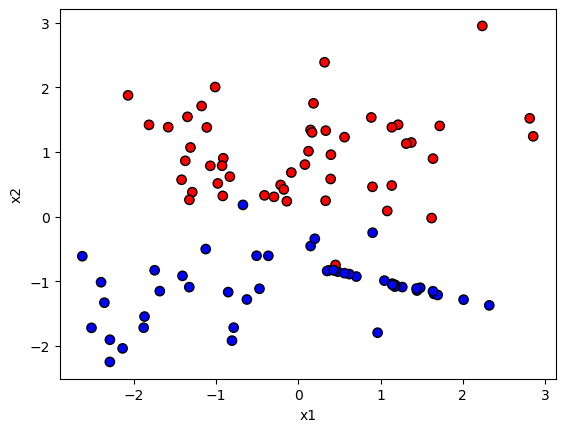

In [155]:
df = pd.DataFrame(np.column_stack((X,y)), columns= list(['x1', 'x2', 'y']))

color_map = {0: 'blue', 1: 'red'}
df['color'] = df['y'].map(color_map)
plt.scatter(df['x1'], df['x2'], marker="o", c=df['color'], s=45, edgecolor="k")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 2- Let's use K-means to classify the data:

##### 2a) First, we have to select K value. In this case, we know that the true data has two clusters, so let's go with k=2

In [156]:
k = 2

##### 2b) Second, the algorithm starts by guessing _K_ centroids:

In [157]:
k1_x1 = np.random.uniform(low=np.min(df['x1']), high=np.max(df['x1']), size=1)
k1_x2 = np.random.uniform(low=np.min(df['x2']), high=np.max(df['x2']), size=1)

k2_x1 = np.random.uniform(low=np.min(df['x1']), high=np.max(df['x1']), size=1)
k2_x2 = np.random.uniform(low=np.min(df['x2']), high=np.max(df['x2']), size=1)

k1 = np.concatenate([k1_x1, k1_x2])
k2 = np.concatenate([k2_x1, k2_x2])

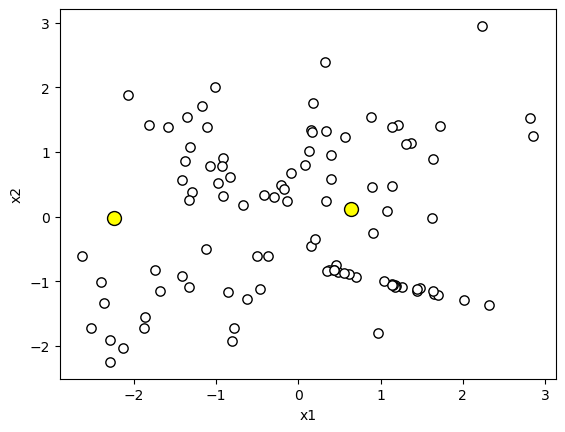

In [158]:
plt.scatter(df['x1'], df['x2'], marker="o", c='white', s=45, edgecolor="k")
plt.scatter(k1[0], k1[1], marker="o", c='yellow', s=100, edgecolor="k")
plt.scatter(k2[0], k2[1], marker="o", c='yellow', s=100, edgecolor="k")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##### 2c) Third, the algorithm calculates the distance of observations to both centroids and assign them to the nearest centroid:

In [159]:
# Make a copy of the original dataframe 
df_k_means = df.copy()

# Function to calculate Euclidean distance from the point
def euclidean_distance(sample, centroid):
    return np.sqrt(np.sum((sample - centroid) ** 2))

# Distance to centroid 1
df_k_means['d1'] = df_k_means[['x1', 'x2']].apply(lambda row: euclidean_distance(row.values, k1), axis=1)

# Distance to centroid 2
df_k_means['d2'] = df_k_means[['x1', 'x2']].apply(lambda row: euclidean_distance(row.values, k2), axis=1)

# Re-classify points based on the new centroids
df_k_means['y'] = np.where(df_k_means['d1'] >= df_k_means['d2'], 0, 1)

In [160]:
df_k_means

,x1,x2,y,color,d1,d2
0,-0.804051,-1.918967,1,blue,2.380577,2.503282
1,1.263895,-1.090356,0,blue,3.661972,1.360619
2,0.081472,0.804443,0,red,2.460848,0.885715
3,-1.286405,0.377401,1,red,1.030384,1.948996
4,1.442379,-1.143862,0,blue,3.848301,1.495450
...,...,...,...,...,...,...
95,-1.008396,2.004083,1,red,2.366854,2.505875
96,-0.409320,0.328399,0,red,1.860994,1.075119
97,0.428895,-0.828767,0,blue,2.786981,0.974934
98,-2.510122,-1.721328,1,blue,1.724489,3.654646


Let's plot the 1st classification attempt:

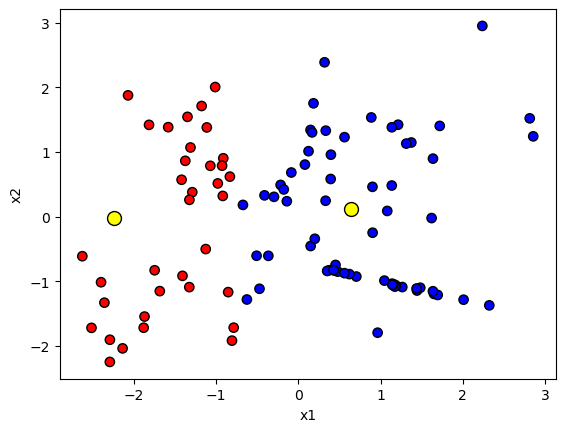

In [161]:
color_map = {0: 'blue', 1: 'red'}
df_k_means['color'] = df_k_means['y'].map(color_map)

plt.scatter(df_k_means['x1'], df_k_means['x2'], marker="o", c=df_k_means['color'], s=45, edgecolor="k")
plt.scatter(k1[0], k1[1], marker="o", c='yellow', s=100, edgecolor="k")
plt.scatter(k2[0], k2[1], marker="o", c='yellow', s=100, edgecolor="k")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##### 2d) Fourth, the algorithm computes new centroids k1 and k2:

In [167]:
k1 = np.mean(df_k_means[df_k_means['y']==0][['x1', 'x2']], axis= 0).values
k2 = np.mean(df_k_means[df_k_means['y']==1][['x1', 'x2']], axis= 0).values
print(k1)
print(k2)

[ 0.779 -0.014]
[-1.499 -0.145]


##### 2f) Fifth, repeat 2c and 2d until convergence.

#### 3- Implementing K-means using scikit learn

In [163]:
from sklearn.cluster import KMeans

Let's use this to cluster the data used in the abovementioned example:

In [164]:
# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the model
kmeans.fit(X)

# Get cluster centers
centers = kmeans.cluster_centers_

# Get labels
labels = kmeans.labels_

In [165]:
centers

array([[ 0.383,  0.245],
       [-1.623, -1.279]])

Plot the result of K-means clustering

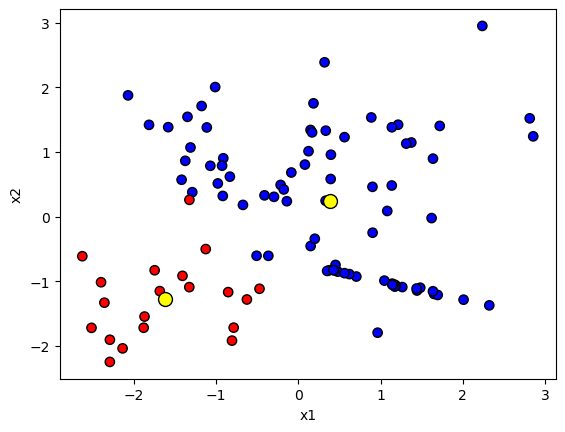

In [166]:
df = pd.DataFrame(np.column_stack((X,labels)), columns= ['x1', 'x2', 'y'])

color_map = {0: 'blue', 1: 'red'}
df['colors'] = df['y'].map(color_map)

plt.scatter(df['x1'], df['x2'], marker="o", c=df['colors'], s=45, edgecolor="k")
plt.scatter(centers[0,0], centers[0,1], marker="o", c='yellow', s=100, edgecolor="k")
plt.scatter(centers[1,0], centers[1,1], marker="o", c='yellow', s=100, edgecolor="k")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [24]:
from scipy.io import loadmat
prec_data = loadmat('/Users/ombadi/Downloads/prec.mat')['prec']

In [25]:
prec_data.shape

(444, 922, 12)

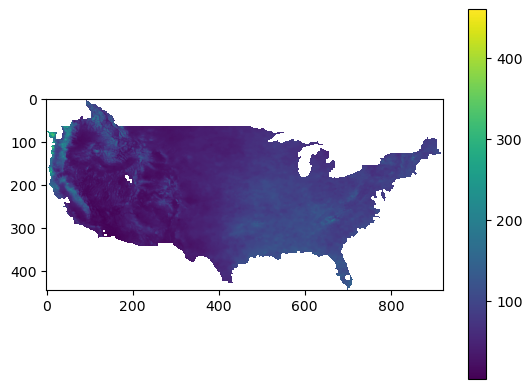

In [31]:
plt.imshow(np.nanmean(prec_data, 2))
plt.colorbar()